In [1]:
library(plyr)
library(randomForest)
library(rpart)
library(rpart.plot)
library(caret)
library(ggplot2)
library(gridExtra)

Warning message:
"package 'plyr' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:randomForest':

    combine



In [16]:
data = read.csv("D:/Imarticus/LMS R/Decision Tree/Dataset/churn.csv")

In [17]:
head(data)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
2907-ILJBN,Female,No,Yes,Yes,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
3896-RCYYE,Female,No,No,No,67,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
9764-REAFF,Female,No,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
6651-RLGGM,Male,No,Yes,Yes,67,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
5879-SESNB,Female,No,No,No,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No
8670-MEFCP,Female,No,Yes,Yes,36,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.90,3379.25,No


### Check for missing data

In [18]:
sapply(data, function(x) sum(is.na(x)))

customerID                  gender           SeniorCitizen 
                      0                       0                       0 
                Partner              Dependents                  tenure 
                      0                       0                       0 
            CallService     MultipleConnections      InternetConnection 
                      0                       0                       0 
         OnlineSecurity            OnlineBackup DeviceProtectionService 
                      0                       0                       0 
          TechnicalHelp                OnlineTV            OnlineMovies 
                      0                       0                       0 
              Agreement           BillingMethod           PaymentMethod 
                      0                       0                       0 
  MonthlyServiceCharges             TotalAmount                   Churn 
                      0                       0                       0

### No missing data in any column

In [19]:
summary(data$SeniorCitizen)

No                  Yes       No.2239Yes9433 
               10016                 1566                    1 
   No.2246YesNoYes23         No.224775624        No.2255No5869 
                   1                    1                    1 
        No.226683937         No.229928648         No.233923754 
                   1                    1                    1 
  No.233YesYes3Yes55         No.234236486      No.2352Yes69No7 
                   1                    1                    1 
     No.2365No948Yes         No.237349355         No.239538674 
                   1                    1                    1 
  No.23NoNo7No7NoYes      No.2443Yes25No2         No.246443869 
                   1                    1                    1 
         No.24843664       No.24No74No984      No.24No9774Yes5 
                   1                    1                    1 
      No.24Yes293875     No.24Yes353Yes43        No.252964Yes3 
                   1                    1                    1 
     No.2572YesNo659      No.2585Yes99No4      No.2597Yes27No5 
                   1                    1                    1 
     No.259Yes537No2       No.25No9No9456       No.25Yes488884 
                   1                    1                    1 
        No.262433544        No.262No4No36        No.26593No452 
                   1                    1                    1 
    No.266Yes56Yes74         No.267948997   No.26Yes33YesYes37 
                   1                    1                    1 
  No.26YesYes6Yes787         No.273585995        No.276No59793 
                   1                    1                    1 
    No.27774YesYes47        No.278969No76        No.278No98355 
                   1                    1                    1 
      No.27988Yes425        No.27No762394       No.27Yes325728 
                   1                    1                    1 
     No.27YesNo26762   No.2838YesYes9Yes3        No.28393No874 
                   1                    1                    1 
      No.284235Yes64          No.28452982        No.28534No468 
                   1                    1                    1 
        No.286827425         No.287868874         No.289625767 
                   1                    1                    1 
      No.289Yes38849    No.28No2Yes5Yes98    No.28Yes64No72Yes 
                   1                    1                    1 
      No.28Yes993467 No.28YesYesYes9Yes73         No.292679736 
                   1                    1                    1 
    No.293Yes93Yes39     No.294492YesYes6      No.2946No722Yes 
                   1                    1                    1 
      No.29757NoNo83          No.29843659   No.29NoNoYes52Yes5 
                   1                    1                    1 
    No.29Yes733Yes92      No.2No4244Yes83        No.2No5623435 
                   1                    1                    1 
       No.2No6866998     No.2No7995YesNo6      No.2No876776Yes 
                   1                    1                    1 
     No.2No9978Yes55       No.2No99No7392      No.2NoNo2895No5 
                   1                    1                    1 
     No.2NoYes693825    No.2NoYesNo62No74      No.2Yes294No688 
                   1                    1                    1 
      No.2Yes2996645    No.2Yes33YesNo258       No.2Yes4276642 
                   1                    1                    1 
    No.2Yes432No7Yes     No.2Yes5No92No62       No.2Yes6252554 
                   1                    1                    1 
  No.2Yes7No8NoYes26    No.2Yes825No42Yes     No.2YesNo6327No9 
                   1                    1                    1 
     No.2YesYes44637    No.2YesYes7No3739 No.2YesYes7Yes528Yes 
                   1                    1                    1 
        No.322724345       No.3234Yes8986         No.323949499 
                   1                    1                    1 
        No.325244392         No.325272369         

In [20]:
summary(data$MultipleConnections)

No No phone service              Yes 
            5952             1425             4958

### The MultipleConnections variable is dependent on the CallService variable, where a ‘no’ for the CallService automatically means a ‘no’ for MultipleConnections. We can again further ease our graphics and modeling by recoding the ‘No call service’ response to ‘No’ for the MultipleLines variable.

In [21]:
data$MultipleConnections = as.factor(mapvalues(data$MultipleConnections, from=c("No phone service"), to=c("No")))

### Similiarly, every online variables are all dependent on the InternetConnections variable. We will recode the responses from ‘No internet service’ to ‘No’ for these variables.

In [22]:
for(i in 10:15){
  data[,i] = as.factor(mapvalues(data[,i],from = c("No internet service"), to= c("No")))
}

### Dropping the customer ID variable as it is not needed in the data modelling. Also senior citizen is generating errors in random forest so dropping that also.

In [23]:
data$customerID = NULL
data$SeniorCitizen = NULL

## Create a train and test data subset.

In [24]:
set.seed(123)
split_train_test = createDataPartition(data$Churn,p=0.7,list=FALSE)
train<- data[split_train_test,]
test<- data[-split_train_test,]

## Data Visualization

In [25]:
#Gender 
plot_gender = ggplot(data, aes(x = gender)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

In [26]:
#Partner
plot_partner = ggplot(data, aes(x = Partner)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

In [27]:
#Dependents
plot_dependents = ggplot(data, aes(x = Dependents)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

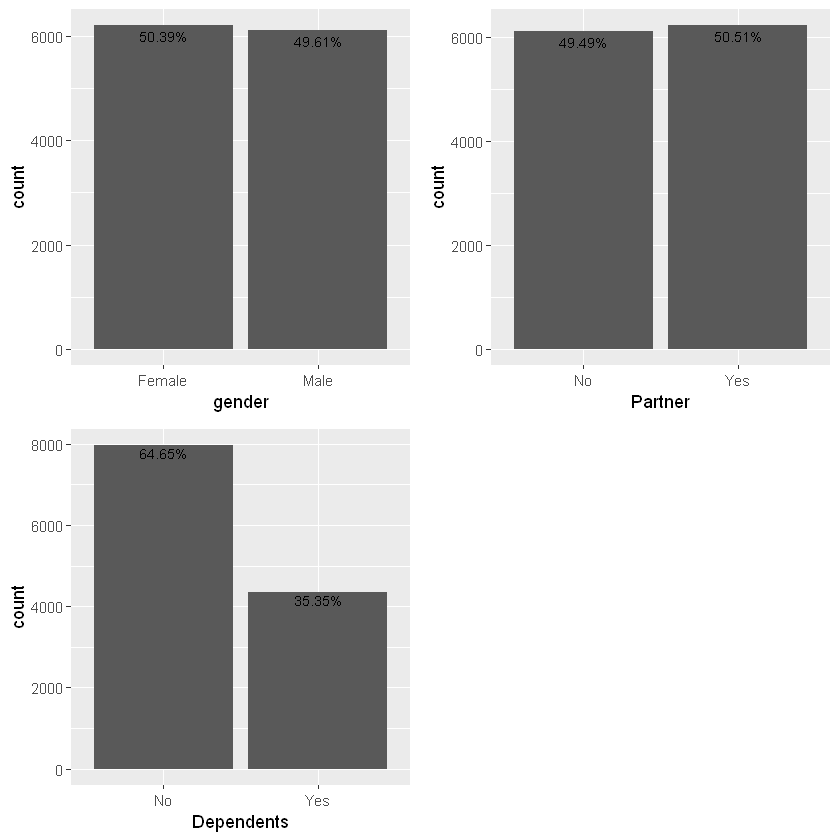

In [28]:
grid.arrange(plot_gender,plot_partner,plot_dependents, ncol = 2)

In [29]:
#Call Service
plot_callservice = ggplot(data, aes(x = CallService)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#MultipleConnections
plot_MultipleConnections = ggplot(data, aes(x = MultipleConnections)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#InternetConnection
plot_InternetConnection = ggplot(data, aes(x = InternetConnection)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Online security
plot_OnlineSecurity = ggplot(data, aes(x = OnlineSecurity)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#OnlineBackup
plot_OnlineBackup = ggplot(data, aes(x = OnlineBackup)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Device Protection service
plot_deviceprotection = ggplot(data, aes(x = DeviceProtectionService)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#TechnicalHelp
plot_TechnicalHelp = ggplot(data, aes(x = TechnicalHelp)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#OnlineTV
plot_OnlineTV = ggplot(data, aes(x = OnlineTV)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#OnlineMovies
plot_OnlineMovies = ggplot(data, aes(x = OnlineMovies)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

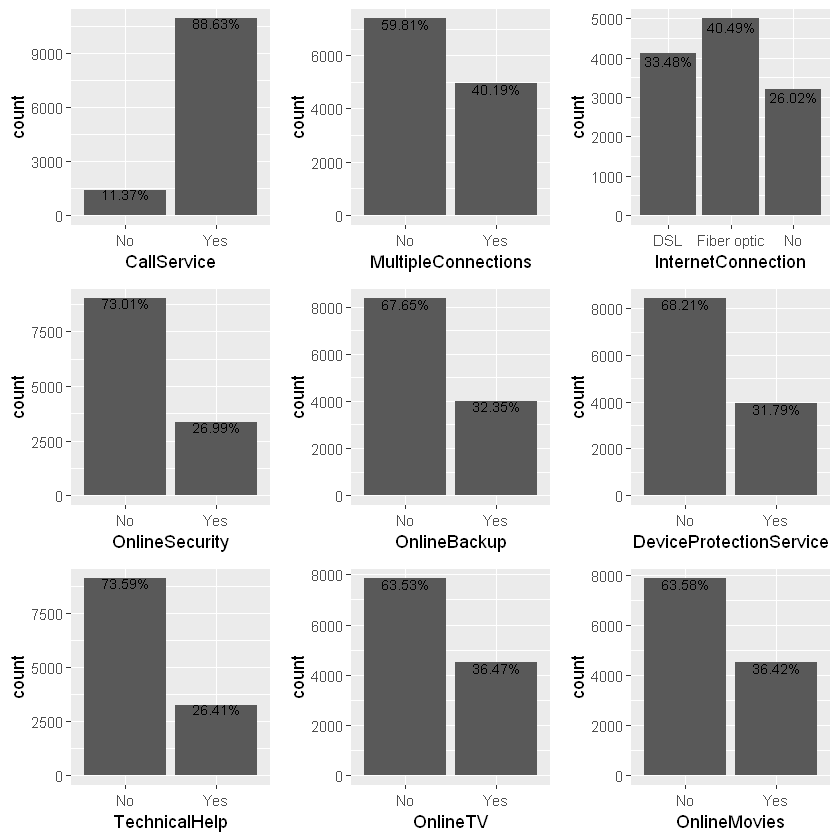

In [30]:
#Plot service data within a grid
grid.arrange(plot_callservice, plot_MultipleConnections, plot_InternetConnection, plot_OnlineSecurity, plot_OnlineBackup, plot_deviceprotection, plot_TechnicalHelp, plot_OnlineTV, plot_OnlineMovies, ncol = 3)

In [31]:
#Agreement
plot_Agreement = ggplot(data, aes(x = Agreement)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#BillingMethod
plot_BillingMethod = ggplot(data, aes(x = BillingMethod)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Payment method
plot_PaymentMethod = ggplot(data, aes(x = PaymentMethod)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

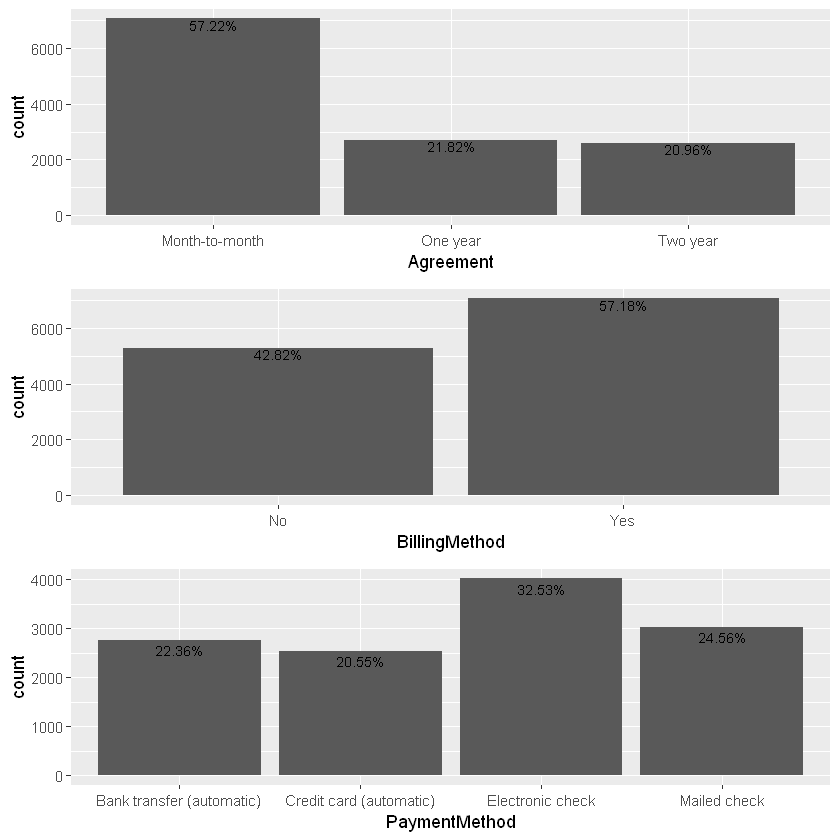

In [32]:
#Plot contract data within a grid
grid.arrange(plot_Agreement, plot_BillingMethod, plot_PaymentMethod, ncol=1)

In [33]:
#Tenure 
plot_tenure = ggplot(data, aes(x = tenure)) +
  geom_histogram(binwidth = 1) +
  labs(x = "Months",
       title = "Tenure Distribtion")

#MonthlyServiceCharges
plot_MonthlyServiceCharges = ggplot(data, aes(x = MonthlyServiceCharges)) +
  geom_histogram(binwidth = 5) +
  labs(x = "Dollars (binwidth = 5)",
       title = "Monthly Service charges Distribtion")

#TotalAmount
plot_TotalAmount = ggplot(data, aes(x = TotalAmount)) +
  geom_histogram(binwidth = 100) +
  labs(x = "Dollars (binwidth = 100)",
       title = "Total charges Distribtion")


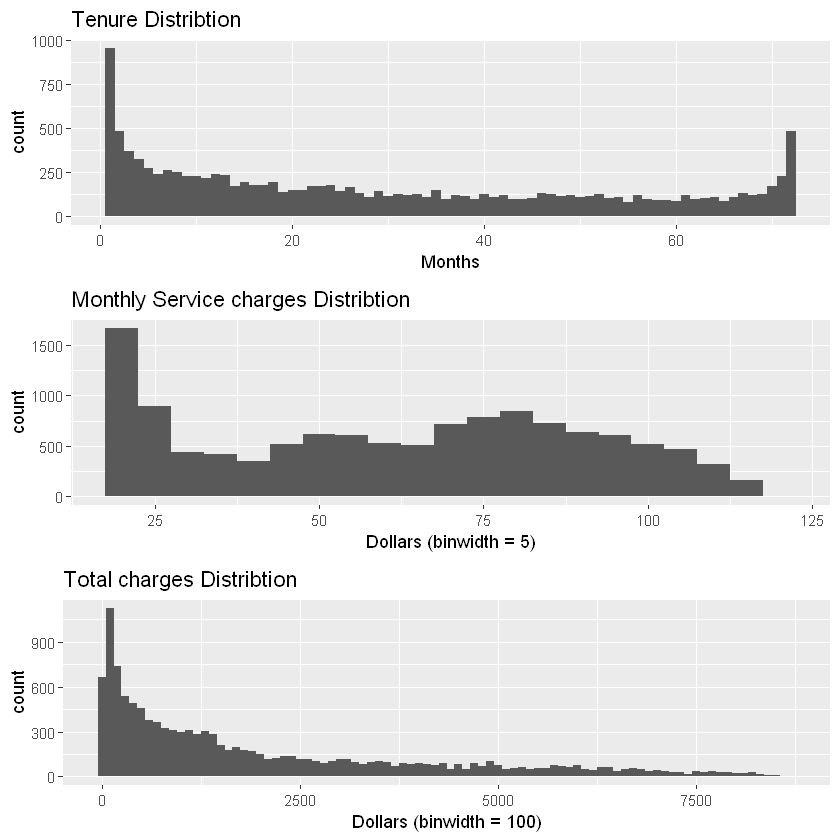

In [34]:
grid.arrange(plot_tenure, plot_MonthlyServiceCharges, plot_TotalAmount, ncol=1)

In [35]:
plot_churn = ggplot(data, aes(x = Churn)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

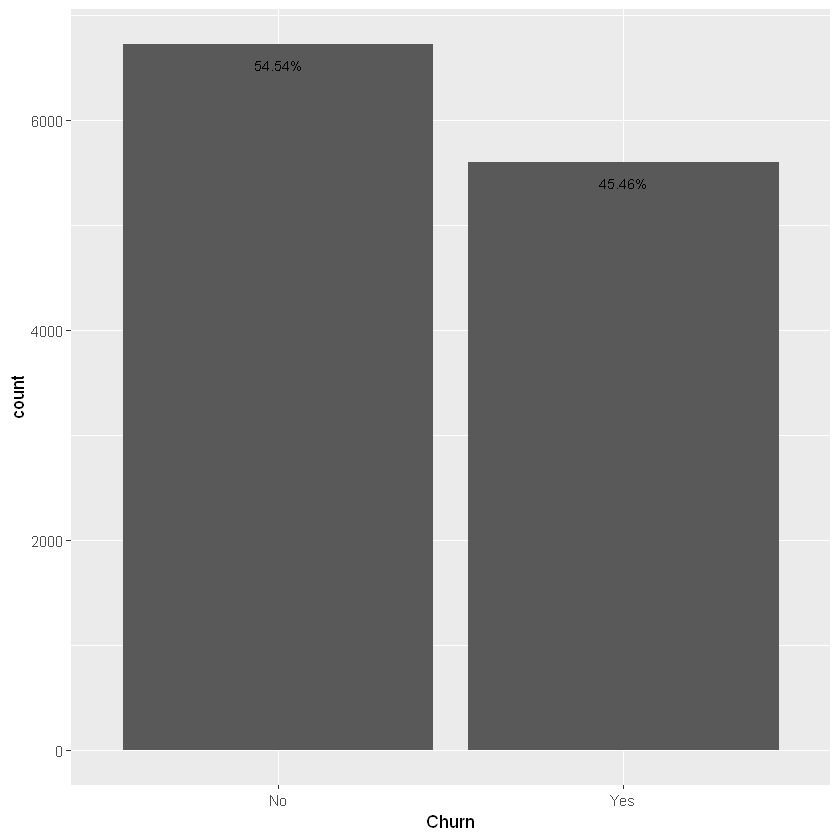

In [36]:
plot_churn

### A little less than half of our sample is no longer the customer.

## Statistical Modelling

## 1. Decision Tree

### Decision tree analysis is a classification method that uses tree-like models of decisions and their possible outcomes. This method is one of the most commonly used tools in machine learning analysis. We will use the rpart library in order to use recursive partitioning methods for decision trees. This exploratory method will identify the most important variables related to churn in a hierarchical format.

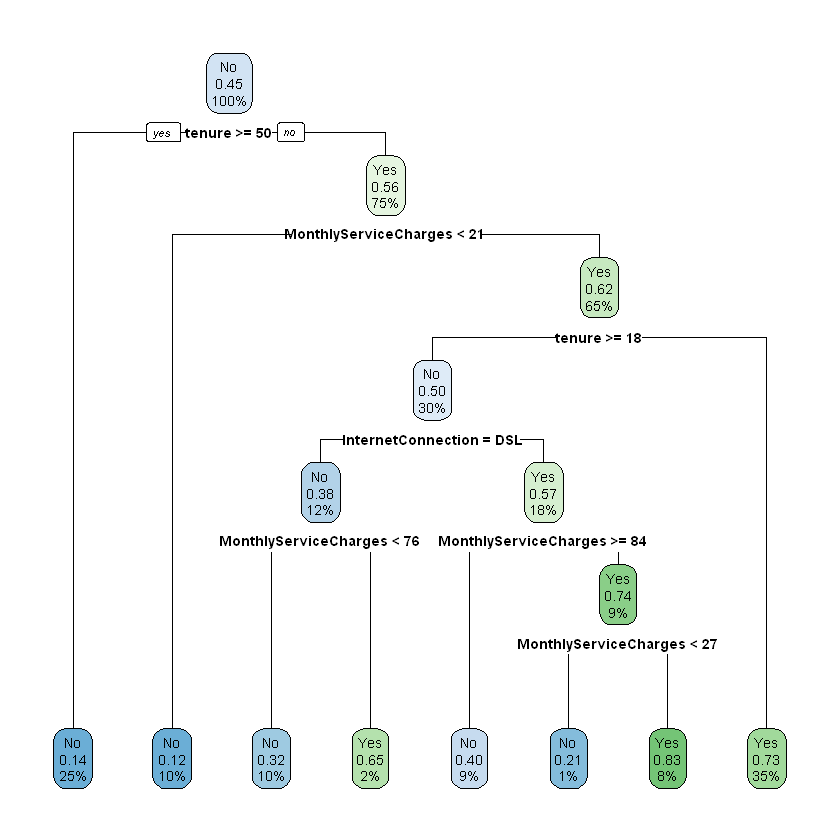

In [37]:
tree = rpart(Churn ~., data = train, method="class")
rpart.plot(tree)

### Confusion Matrix

In [38]:
tree_1 = predict(tree, test)
tree_1 <- ifelse(tree_1[,2] > 0.5,"Yes","No")
table(Predicted = tree_1, Actual = test$Churn)

         Actual
Predicted   No  Yes
      No  1563  402
      Yes  455 1280

### The diagonal entries give our correct predictions, with the upper left being TN and the lower right being TP. The upper right gives the FN while the lower left gives the FP. From this confusion matrix, we can see that the model performs well at predicting non-churning customers but does not perform as well at predicting churning customers.

### Predicting the accuracy of the model

In [39]:
tree_2 = predict(tree, train)
tree_2 = ifelse(tree_2[,2] > 0.5,"Yes","No")
tree_tab1 = table(Predicted = tree_2, Actual = train$Churn)
tree_tab2 = table(Predicted = tree_1, Actual = test$Churn)
accuracy = sum(diag(tree_tab2))/sum(tree_tab2)
accuracy

[1] 0.7683784

## 2. Random Forest 

### Random forest analysis is another machine learning classification method that is often used in customer churn analysis. The method operates by constructing multiple decision trees and constructing models based on summary statistics of these decision trees.We will begin by identifying the number of variables randomly sampled as candidates at each split of the algorithm. In the randomForest package, this is referred to as the ‘mtry’ parameter or argument.

In [40]:
#Set control parameters for random forest model selection
control = trainControl(method = "cv", number=5, 
                     classProbs = TRUE, summaryFunction = twoClassSummary)

#Exploratory random forest model selection
ran_fit = train(Churn ~., data = train,
                 method = "rf",
                 ntree = 75,
                 tuneLength = 5,
                 metric = "ROC",
                 trControl = control)
ran_fit

Random Forest 

8635 samples
  18 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6908, 6908, 6908, 6908, 6908 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.8886546  0.8148620  0.8170701
   7    0.9364971  0.8946921  0.8048408
  12    0.9382428  0.9006369  0.7943949
  17    0.9377787  0.9031847  0.7877707
  22    0.9363524  0.9036093  0.7814013

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 12.

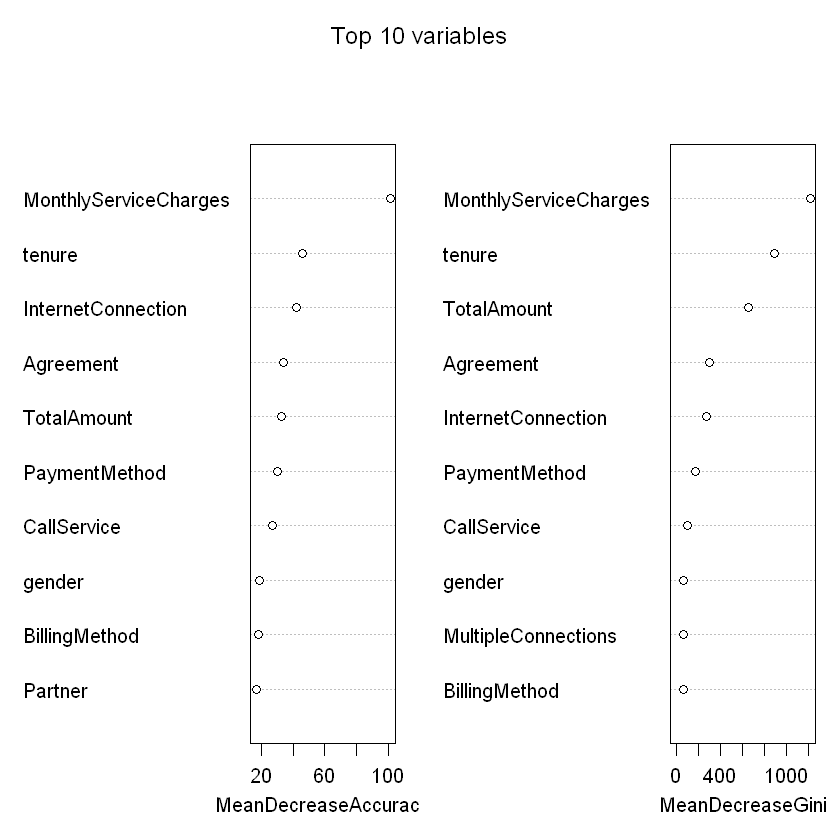

In [42]:
ran_fit1 = randomForest(Churn ~., data = train, 
                        ntree = 75, mtry = 12, 
                        importance = TRUE, proximity = TRUE)

#Display variable importance from random tree
varImpPlot(ran_fit1, sort=T, n.var = 10, 
           main = 'Top 10 variables')

In [45]:
ran_fit_pred = predict(ran_fit1,test)

In [46]:
table(Predicted = ran_fit_pred, Actual = test$Churn)

         Actual
Predicted   No  Yes
      No  1850  300
      Yes  168 1382

In [47]:
ran_fit_pred_1 = predict(ran_fit1, train)
ran_fit_tab = table(Predicted = ran_fit_pred_1, Actual = train$Churn)
ran_fit_tab_1 = table(Predicted = ran_fit_pred, Actual = test$Churn)
accuracy_rf = sum(diag(ran_fit_tab_1))/sum(ran_fit_tab_1)
accuracy_rf

[1] 0.8735135

### Random Forest Analysis has come out to be more accurate than the Decision Tree analysis.

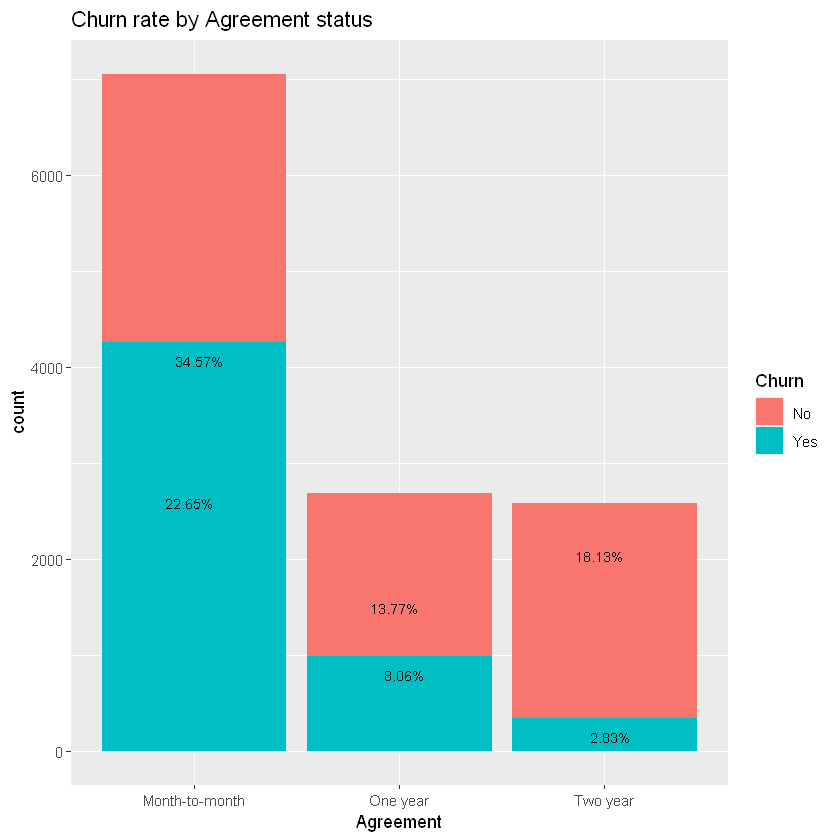

In [49]:
plot_churn_agreement <- ggplot(data, aes(x = Agreement, fill = Churn)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3) +
  labs(title="Churn rate by Agreement status")

plot_churn_agreement

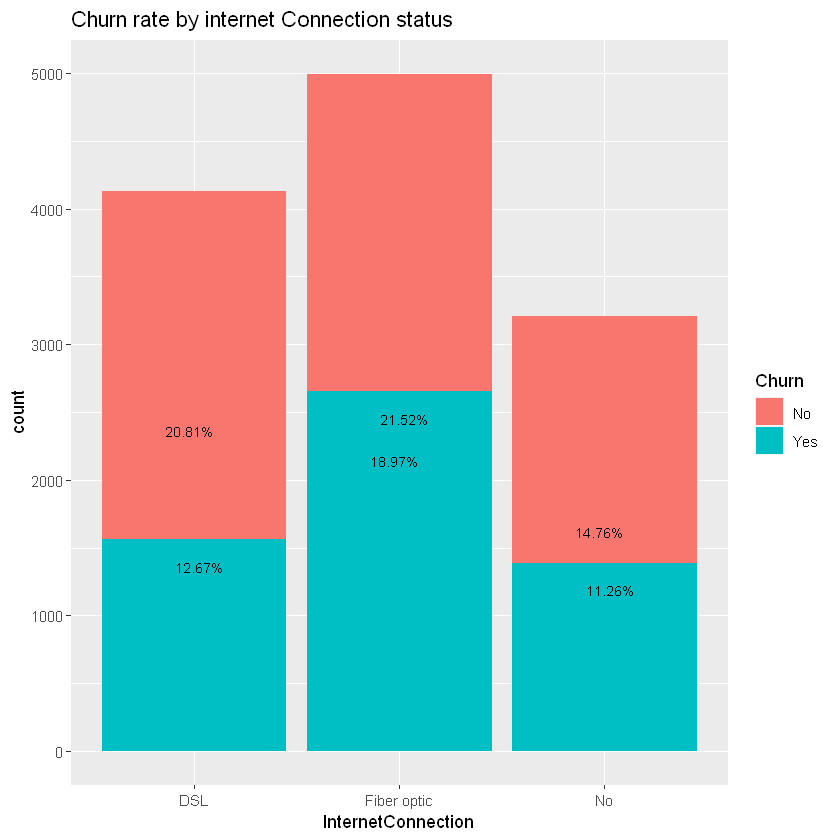

In [51]:
plot_churn_Internetconnection <- ggplot(data, aes(x = InternetConnection, fill = Churn)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3) +
  labs(title="Churn rate by internet Connection status")

plot_churn_Internetconnection

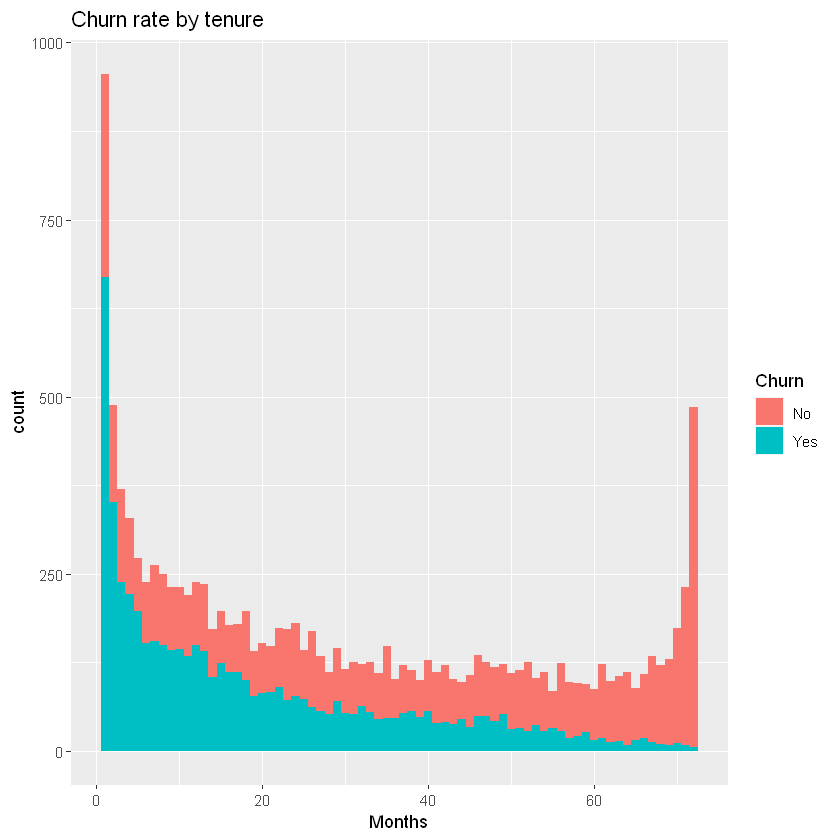

In [52]:
plot_churn_tenure <- ggplot(data, aes(x = tenure, fill = Churn)) +
  geom_histogram(binwidth = 1) +
  labs(x = "Months",
       title = "Churn rate by tenure")
plot_churn_tenure